In [18]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [19]:
# read the text file
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [20]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [21]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

torch.float32


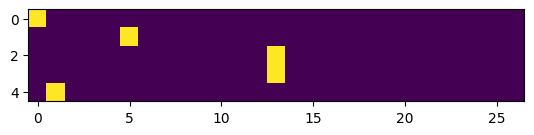

In [22]:
xenc = F.one_hot(xs, num_classes=27).float() # otherwise its int64
print(xenc.dtype)
plt.imshow(xenc[:5])

In [23]:
seed = 2147483647
g = torch.Generator().manual_seed(seed)
W = torch.randn((27, 27), generator=g, requires_grad=True) # weight matrix for 27 inputs X 27 neurons
xenc[:1] @ W 

tensor([[ 1.5674, -0.2373, -0.0274, -1.1008,  0.2859, -0.0296, -1.5471,  0.6049,
          0.0791,  0.9046, -0.4713,  0.7868, -0.3284, -0.4330,  1.3729,  2.9334,
          1.5618, -1.6261,  0.6772, -0.8404,  0.9849, -0.1484, -1.4795,  0.4483,
         -0.0707,  2.4968,  2.4448]], grad_fn=<MmBackward0>)

In [24]:
(xenc[:1] @ W).exp() # negative numbers go between 0-1

tensor([[ 4.7940,  0.7888,  0.9730,  0.3326,  1.3309,  0.9708,  0.2129,  1.8311,
          1.0824,  2.4710,  0.6242,  2.1964,  0.7200,  0.6486,  3.9469, 18.7908,
          4.7673,  0.1967,  1.9683,  0.4315,  2.6775,  0.8621,  0.2277,  1.5656,
          0.9317, 12.1434, 11.5281]], grad_fn=<ExpBackward0>)

In [25]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # otherwise its int64
logits = xenc @ W  # log-counts
counts = logits.exp() # like a count matrix
probs = counts / counts.sum(1, keepdims=True) # exponantiate + normalise = SOFTMAX
loss = -probs[torch.arange(len(probs)), ys].log().mean()
loss

tensor(3.7590, grad_fn=<NegBackward0>)

In [26]:
# reset grad / backward pass
W.grad = None
loss.backward()

In [27]:
# update the parameters
W.data -= 0.1 * W.grad

In [28]:
lr = 50
regularization_const = 0.01
for i in range(300):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(len(probs)), ys].log().mean() + regularization_const * (W**2).mean() # this will push W to be 0
    print(f'{i}th iteration loss {loss}')

    # reset grad / backward pass
    W.grad = None
    loss.backward()

    # update the parameters
    W.data -= lr * W.grad

0th iteration loss 3.76770281791687
1th iteration loss 3.3782901763916016
2th iteration loss 3.160780668258667
3th iteration loss 3.0269784927368164
4th iteration loss 2.934335470199585
5th iteration loss 2.8671212196350098
6th iteration loss 2.8165693283081055
7th iteration loss 2.777078866958618
8th iteration loss 2.7451984882354736
9th iteration loss 2.7187840938568115
10th iteration loss 2.6964662075042725
11th iteration loss 2.677338123321533
12th iteration loss 2.660775661468506
13th iteration loss 2.6463255882263184
14th iteration loss 2.6336419582366943
15th iteration loss 2.6224513053894043
16th iteration loss 2.6125295162200928
17th iteration loss 2.6036906242370605
18th iteration loss 2.595780372619629
19th iteration loss 2.58866810798645
20th iteration loss 2.582244396209717
21th iteration loss 2.576418876647949
22th iteration loss 2.5711135864257812
23th iteration loss 2.5662636756896973
24th iteration loss 2.561814308166504
25th iteration loss 2.5577187538146973
26th iter

In [29]:
# sample from the model

# annnnd we get the exact same results as the first demo :) 
seed = 2147483647
g = torch.Generator().manual_seed(seed)

# sample 20 names
ix = 0
for _ in range(20):
    out = ''
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out += itos[ix]
    print(out)
    



cexze
momasurailezityha
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
fobspehinivenvtahlasu
dsor
br
jol
pen
aisan
ja
